In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
!pip install chardet
import chardet
with open("/content/ToyotaCorolla (1).csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [5]:
data = pd.read_csv("/content/ToyotaCorolla (1).csv", encoding=encoding)

In [6]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
data = data.drop(data.iloc[:,18:37], axis=1)

In [9]:
df= data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Tow_Bar'],axis=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

In [12]:
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')
df['Age_08_04']=pd.to_numeric(df['Age_08_04'],errors='coerce')
df['KM']=pd.to_numeric(df['KM'],errors='coerce')
df['HP']=pd.to_numeric(df['HP'],errors='coerce')
df['cc']=pd.to_numeric(df['cc'],errors='coerce')
df['Doors']=pd.to_numeric(df['Doors'],errors='coerce')
df['Gears']=pd.to_numeric(df['Gears'],errors='coerce')
df['Quarterly_Tax']=pd.to_numeric(df['Quarterly_Tax'],errors='coerce')

In [13]:
df=df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [15]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [16]:
import statsmodels.formula.api as smf

In [17]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=df).fit()

In [18]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [19]:
model.tvalues

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64

In [20]:
 np.round(model.pvalues,5)

Intercept        0.00011
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64

In [21]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [22]:
# model has an accuracy of 84.6%

In [23]:
# cc and Doors have p value greater than alpha 0.05

In [24]:
#using MLR and SLR to fit these 2 parameters into the ols model to check why this is

In [25]:
model1 = smf.ols("Price~cc", data=df).fit()

In [26]:
np.round(model1.pvalues,5)

Intercept    0.0
cc           0.0
dtype: float64

In [27]:
model2 = smf.ols("Price~Doors", data=df).fit()

In [28]:
np.round(model2.pvalues,5)

Intercept    0.0
Doors        0.0
dtype: float64

In [29]:
model3 = smf.ols("Price~cc+Doors", data=df).fit()

In [30]:
np.round(model3.pvalues,5)

Intercept    0.00000
cc           0.00002
Doors        0.00000
dtype: float64

In [31]:
#Running model validation technique, calculating VIF

In [32]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

In [33]:
rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [34]:
rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [35]:
rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [36]:
rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

In [37]:
rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=df).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

In [38]:
rsq_QuarterlyTax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
vif_QuarterlyTax=1/(1-rsq_QuarterlyTax)

In [39]:
rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=df).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

In [40]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QuarterlyTax,vif_Weight]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [41]:
#the VIF values indicate that there is no collinearity in any of the variables (all values<20),
#considering all variables in regression equation

In [42]:
#Residual analysis
#1.) Q-Q plot

In [43]:
import statsmodels.api as sm

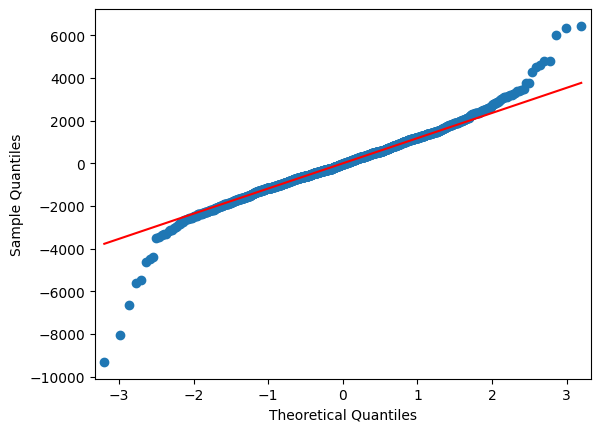

In [44]:
qqplot= sm.qqplot(model.resid, line='q')

In [45]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [46]:
#Residual plot for homoscedasticity

In [47]:
def get_standardized_values(vals):
    return((vals - vals.mean())/vals.std())

Text(0, 0.5, 'standardized residual values')

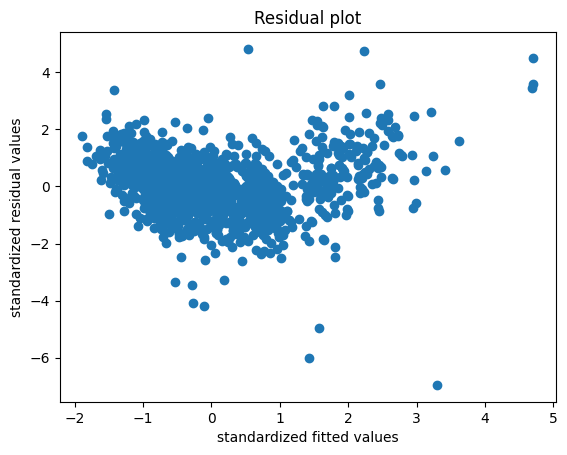

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')

In [49]:
#residual vs regressor plot

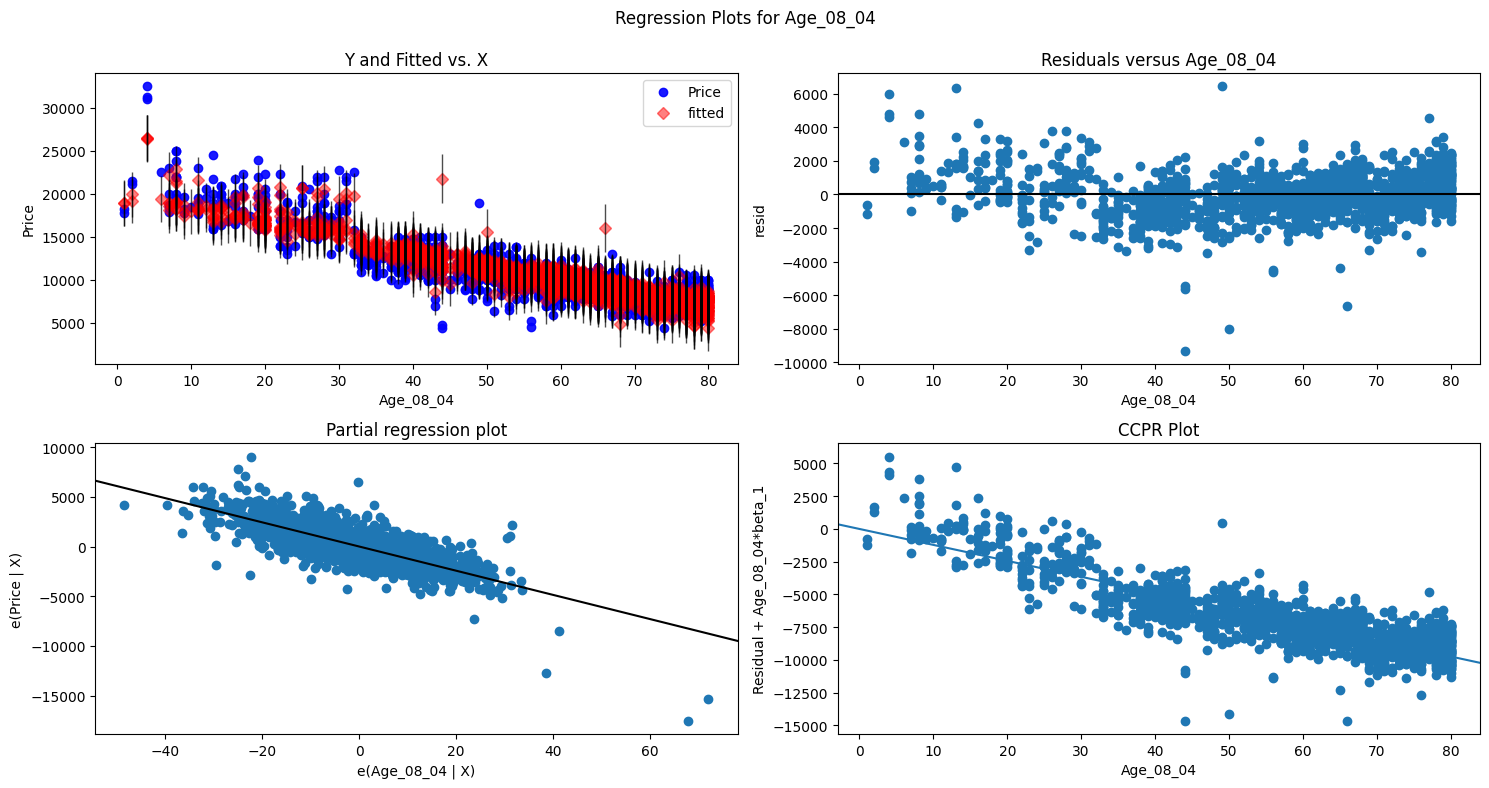

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

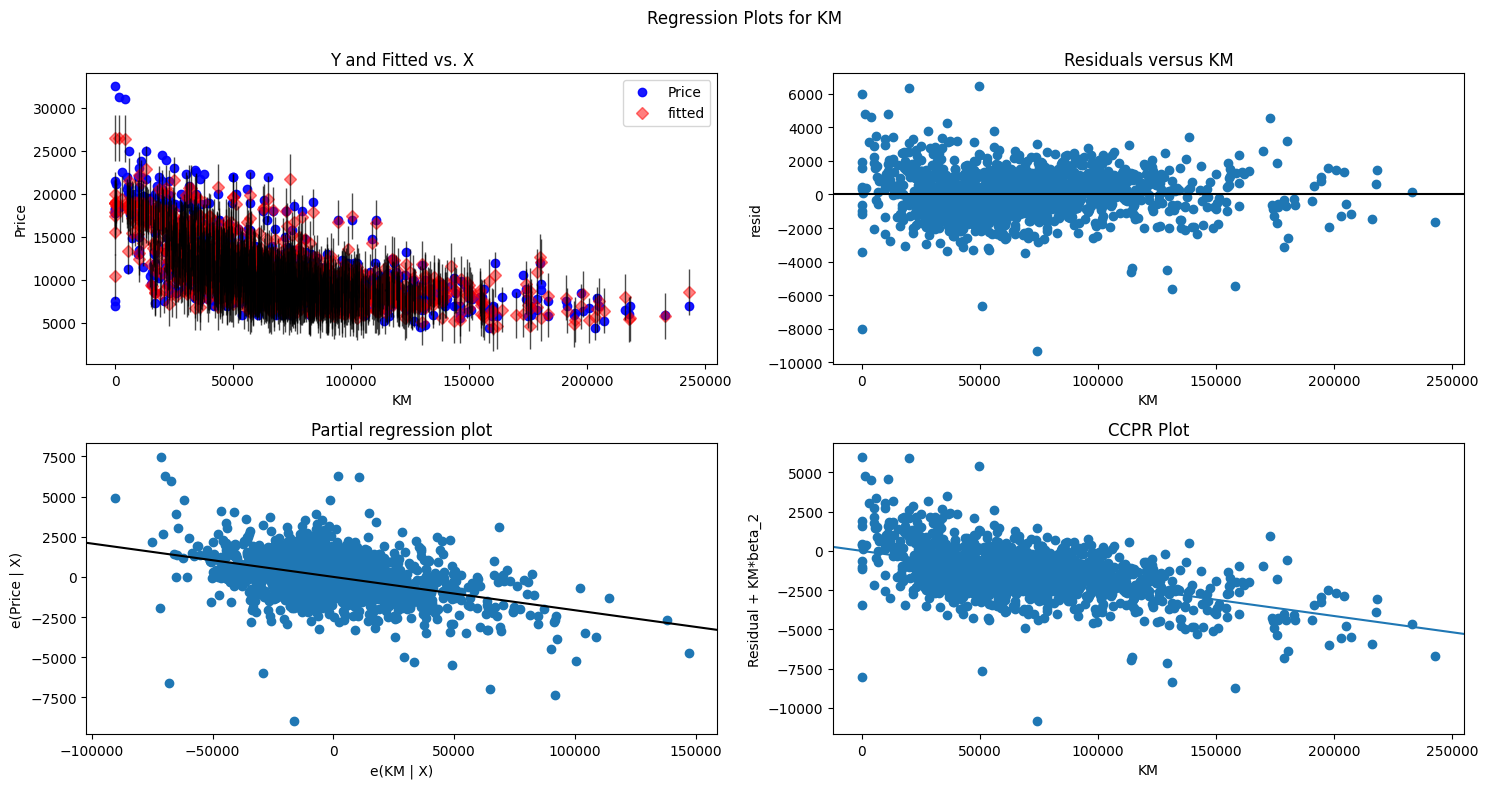

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

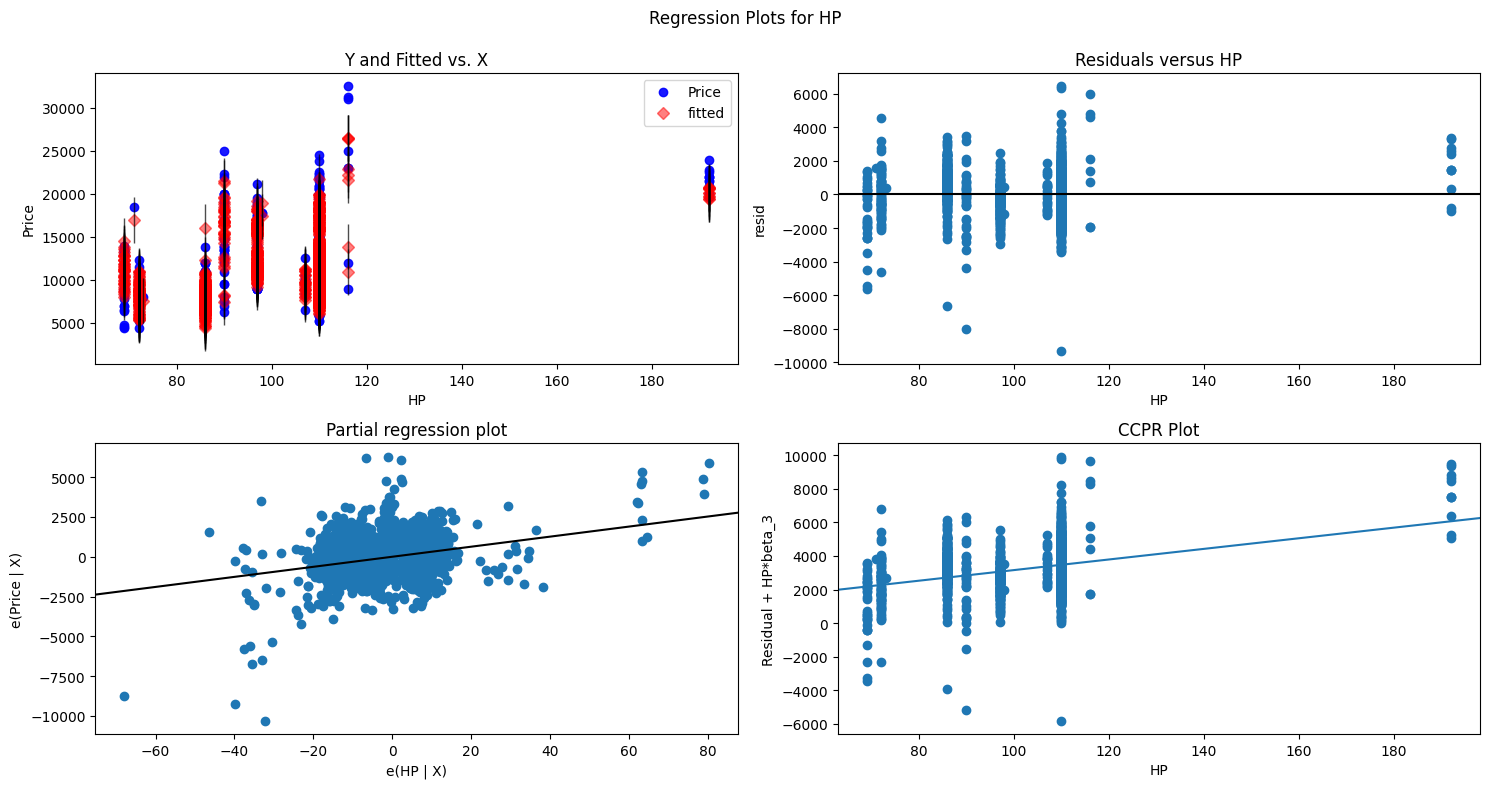

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

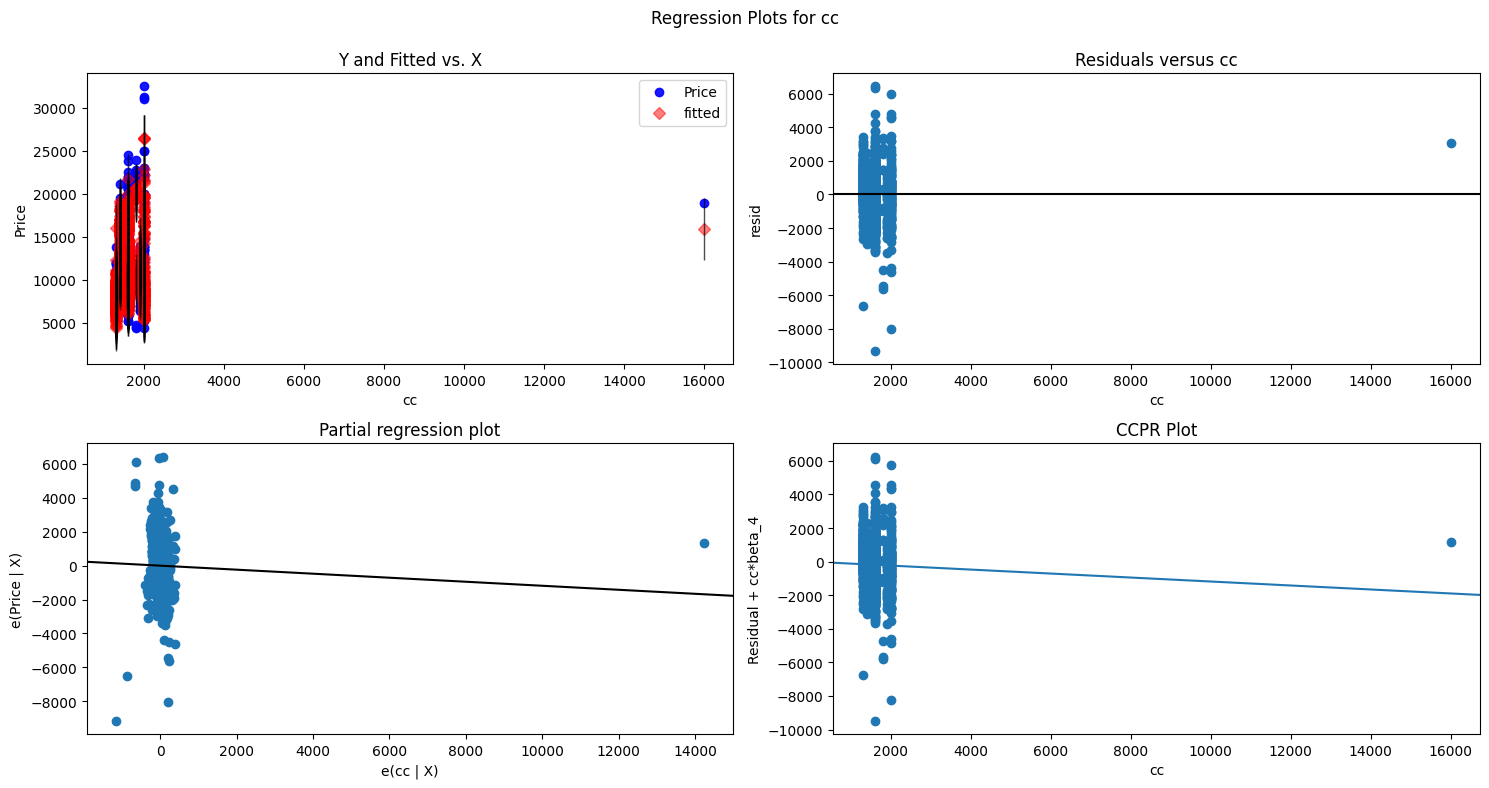

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

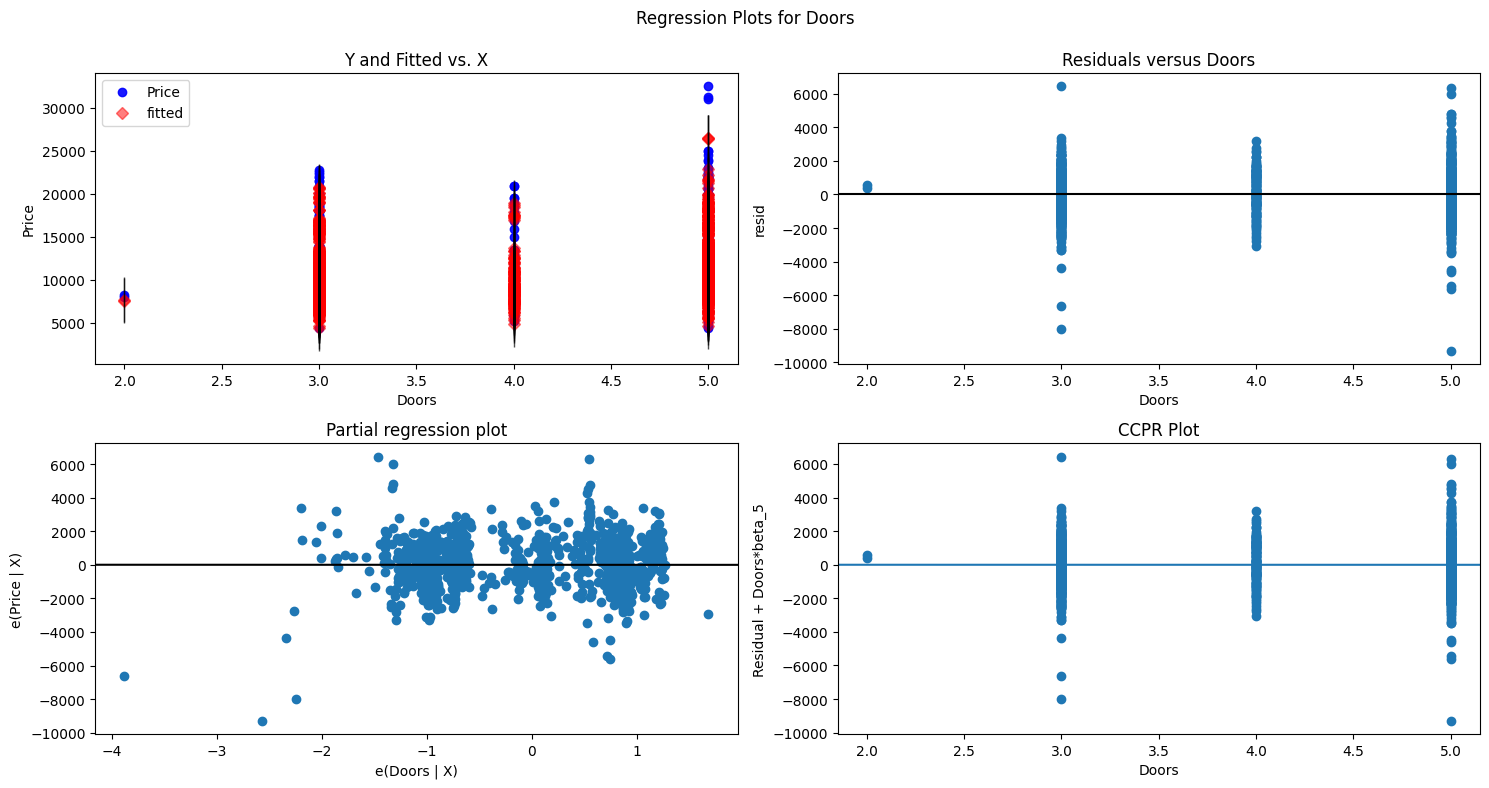

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

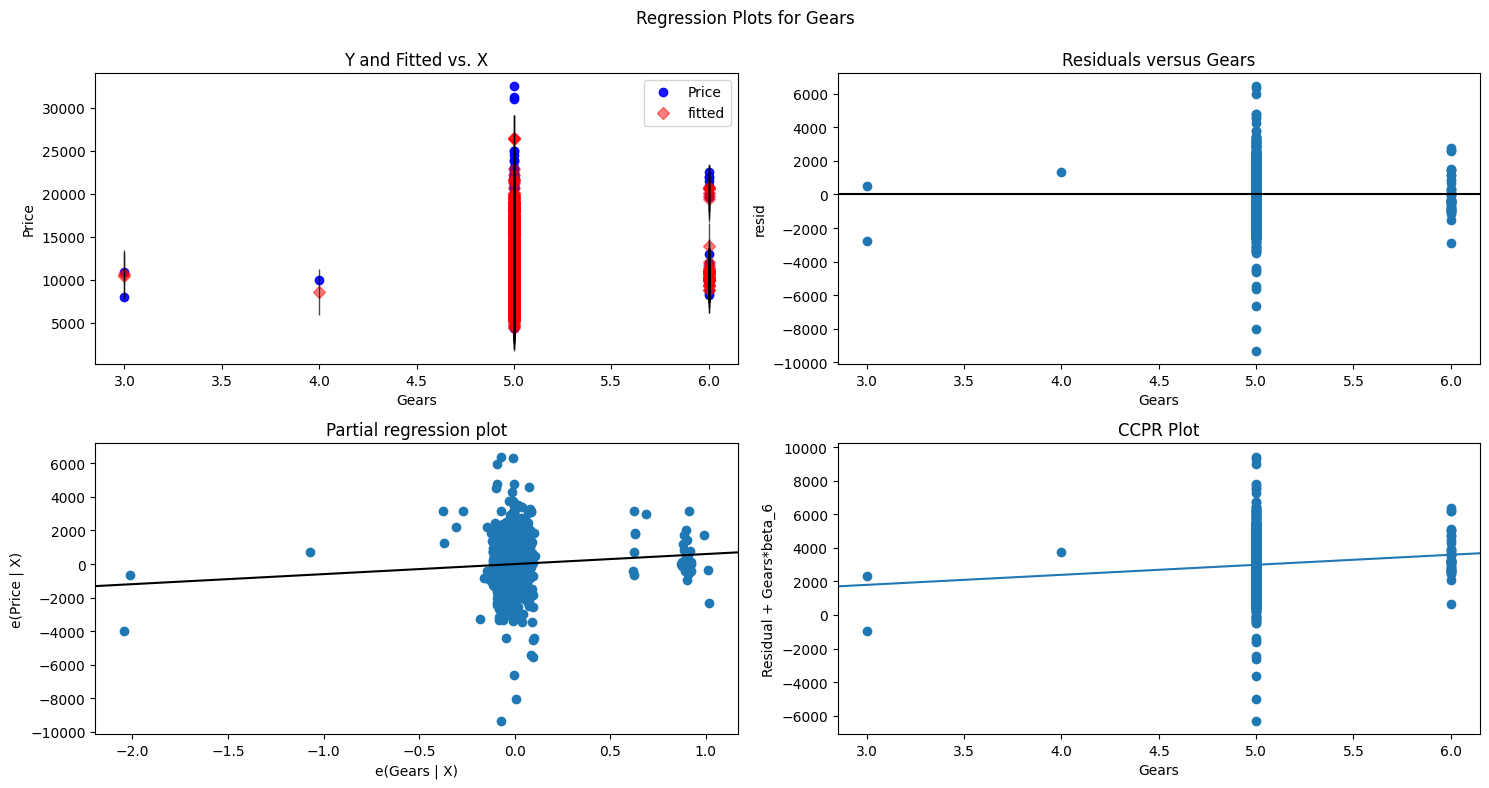

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

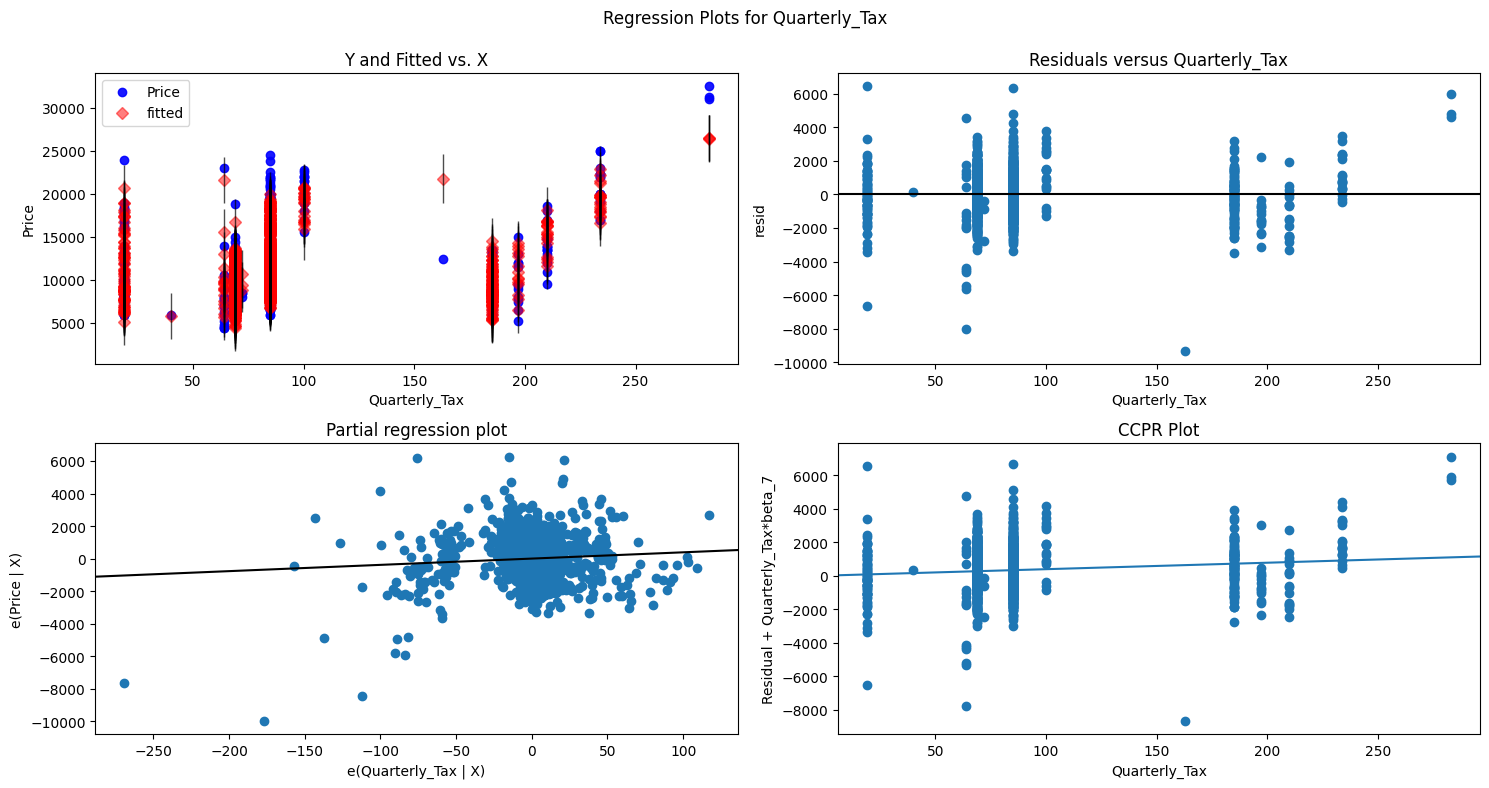

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

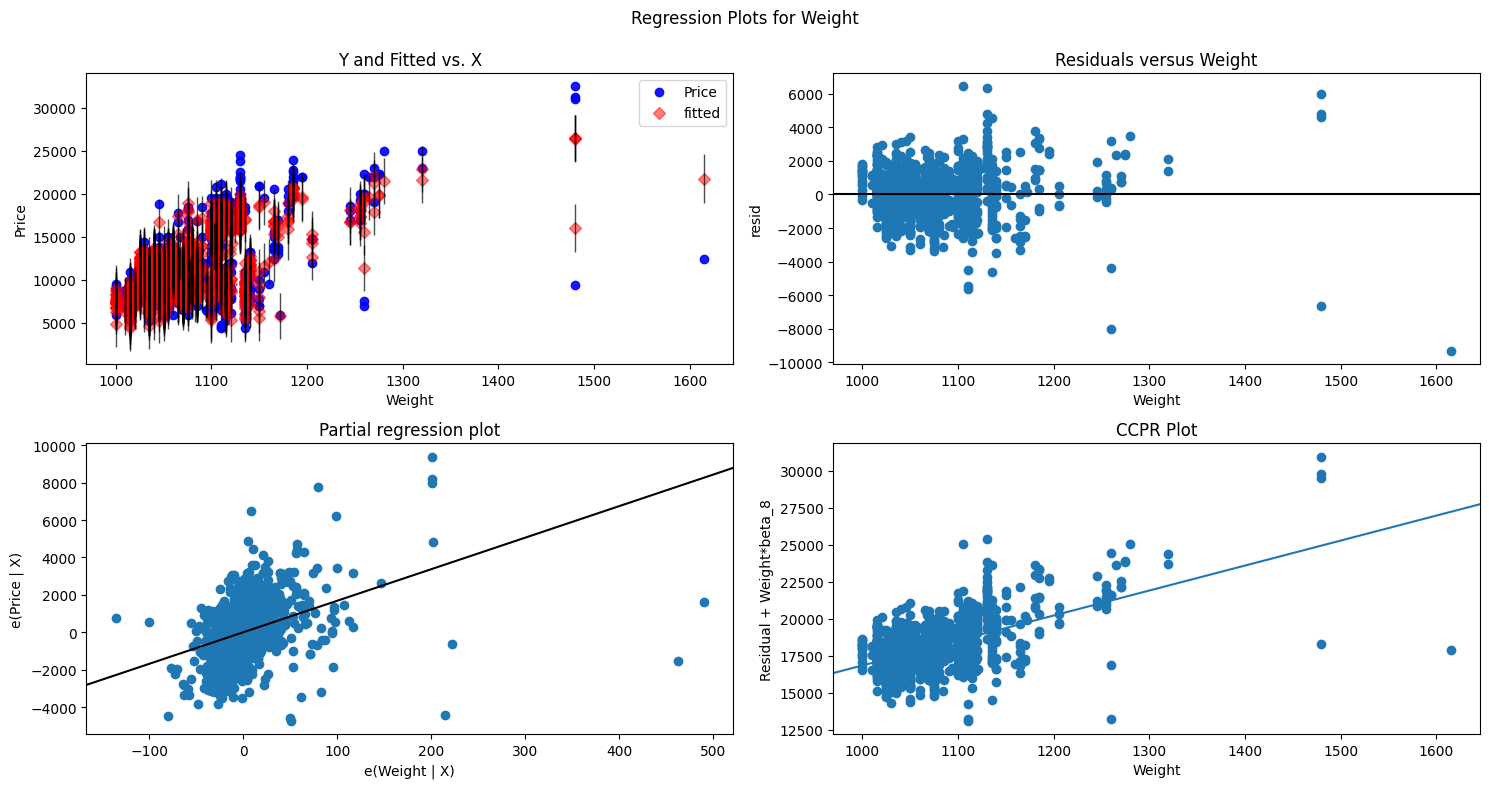

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [58]:
#Model Deletion Diagnostics
#Cook's Distance &  Leverage value

In [59]:
model_influnece = model.get_influence()

In [60]:
(c, _) = model_influnece.cooks_distance

In [61]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

In [62]:
# plotting influencers using stem plot

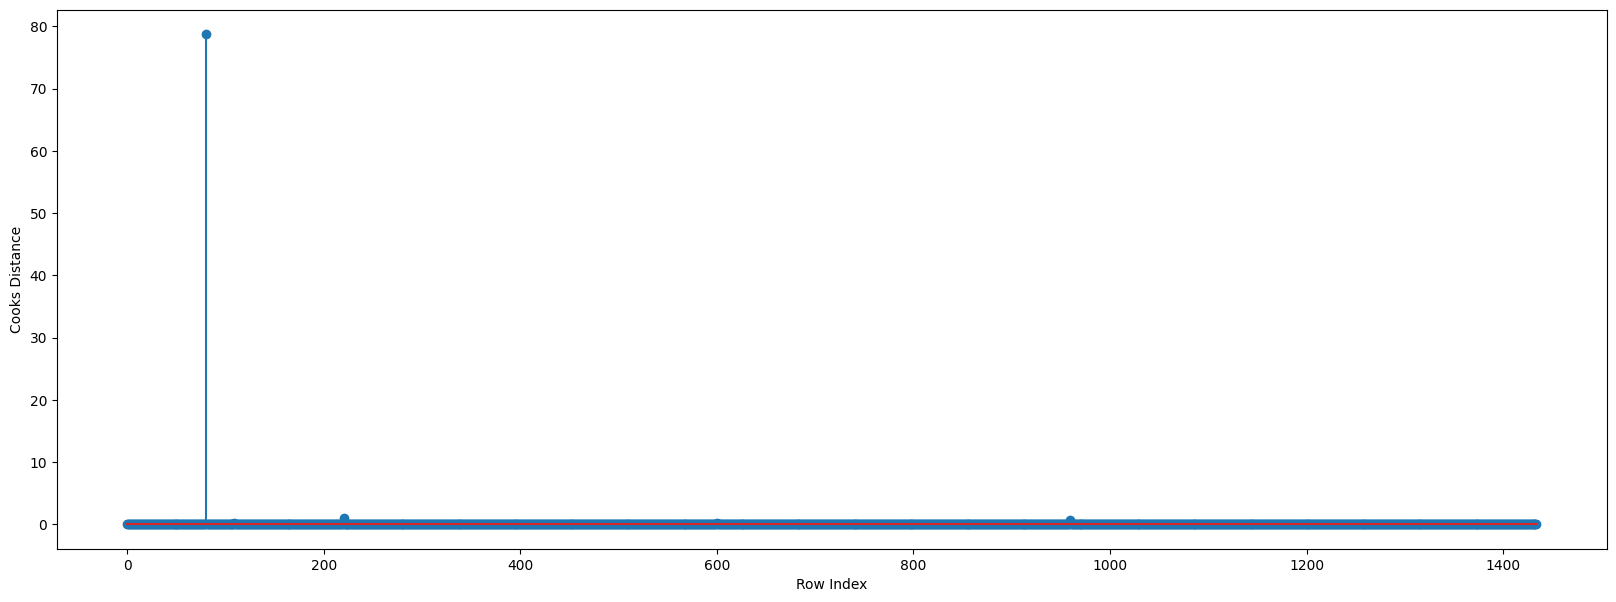

In [63]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

In [65]:
#finding high influence points

In [66]:
from statsmodels.graphics.regressionplots import influence_plot

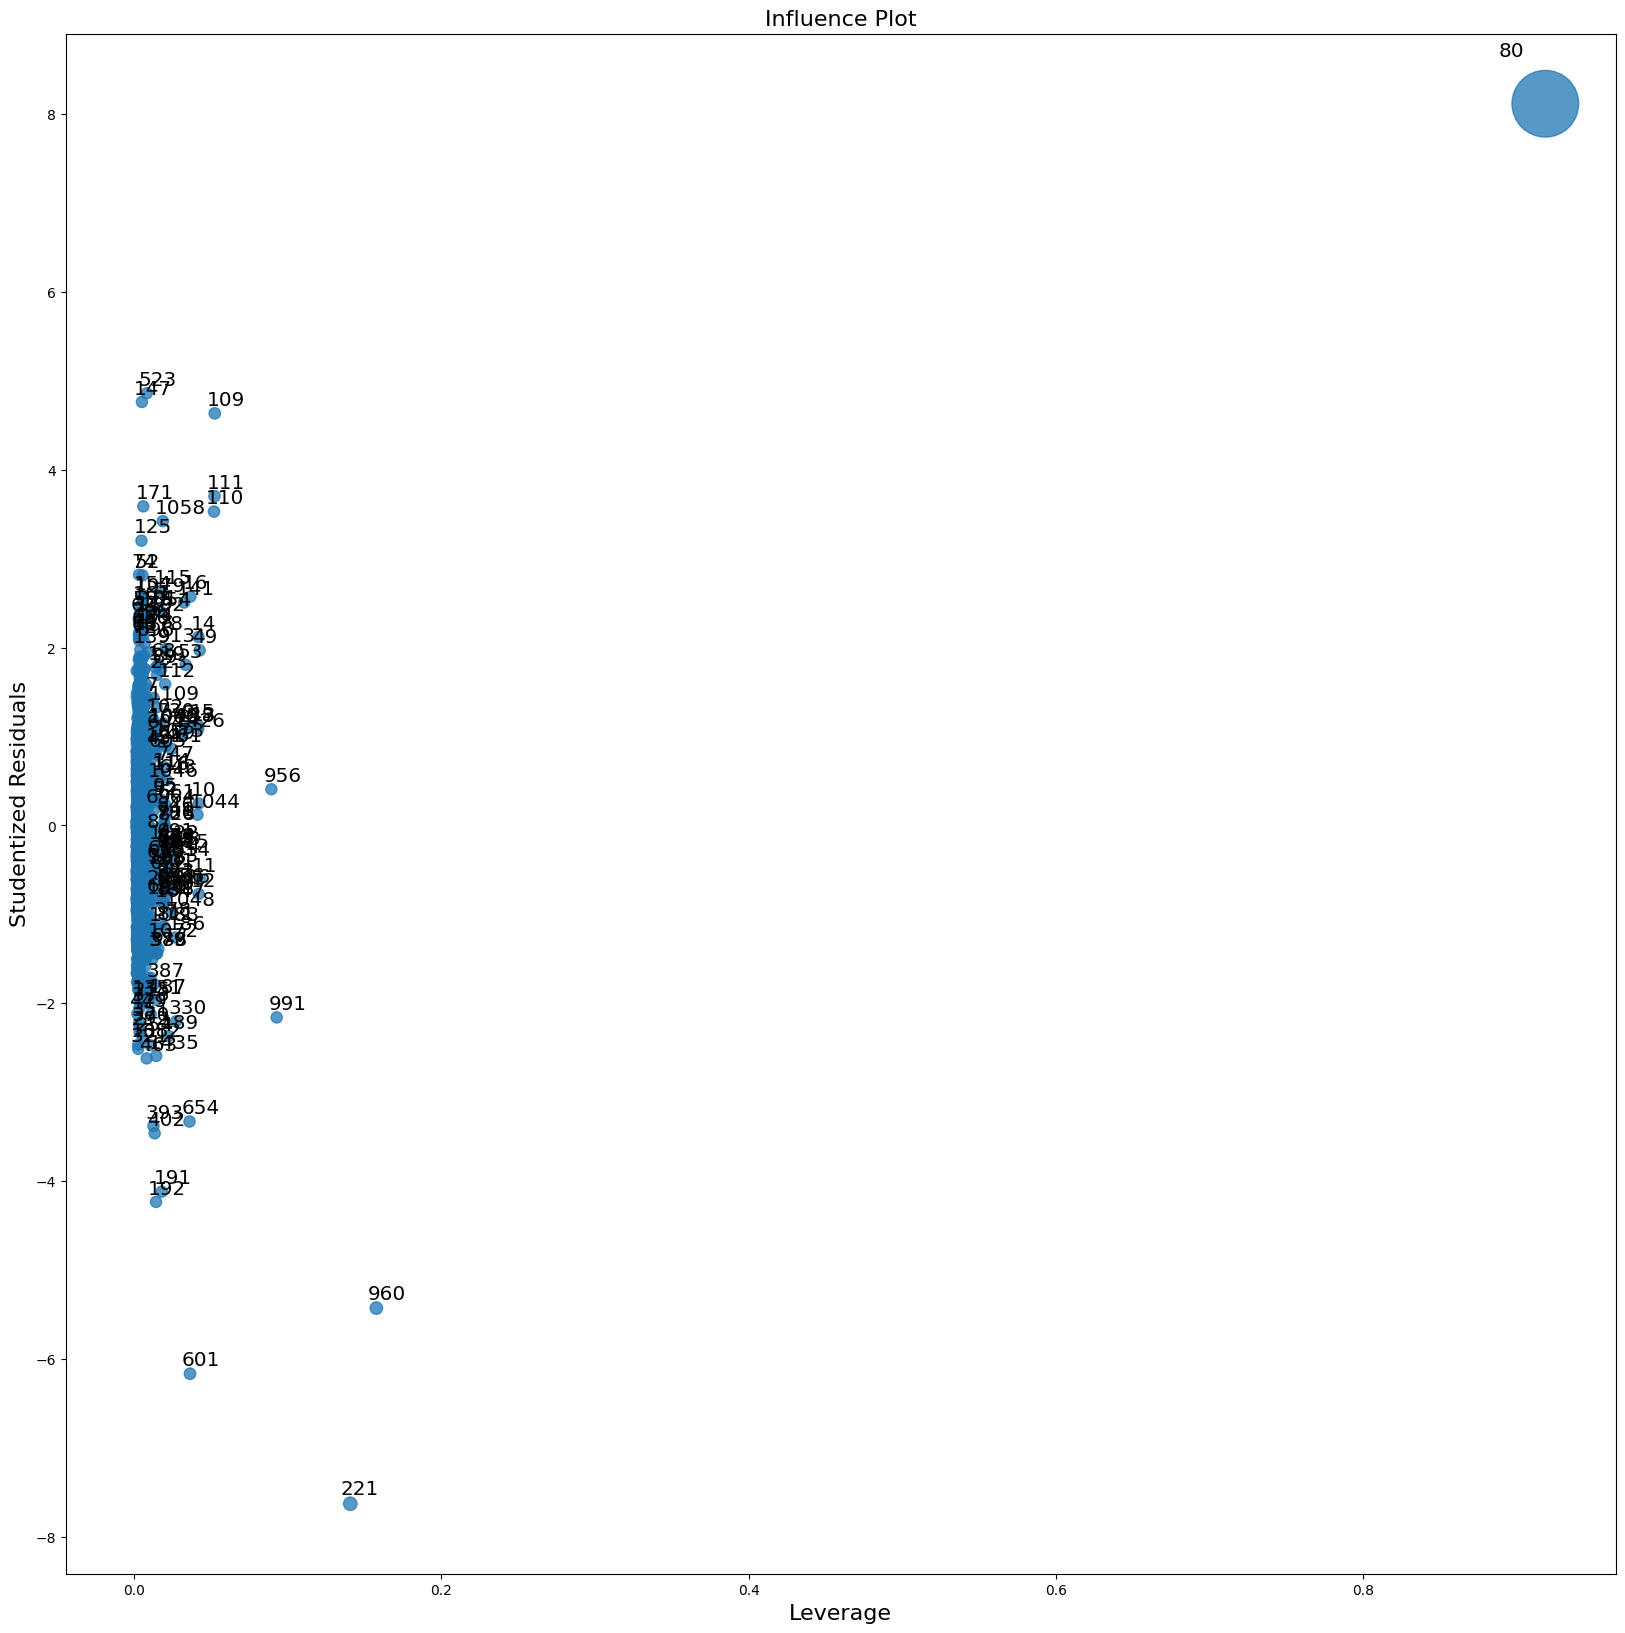

In [67]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [68]:
k=df.shape[1] # columns, no  of parameters
n=df.shape[0] # rows, total no of datapoints
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [69]:
# before we drop rows from original data, create a copy

In [70]:
df_new = df.copy()
df_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [71]:
#discarding the 80th row

In [72]:
df_new=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [73]:
# Final model

In [74]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df_new
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [75]:
#Model Predictions

In [76]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [77]:
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [79]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)


In [81]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  #can adjust alpha parameter
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)


In [82]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


In [84]:
from sklearn.metrics import r2_score

# Linear Regression
r2_linear = linear_reg.score(X_test, y_test)

# Lasso Regression
r2_lasso = lasso_reg.score(X_test, y_test)

# Ridge Regression
r2_ridge = ridge_reg.score(X_test, y_test)

print("R-squared value - Linear Regression:", r2_linear)
print("R-squared value - Lasso Regression:", r2_lasso)
print("R-squared value - Ridge Regression:", r2_ridge)


R-squared value - Linear Regression: 0.8436314958773415
R-squared value - Lasso Regression: 0.8436115916512364
R-squared value - Ridge Regression: 0.8436245512270613
